# <span style="color:green"> Laboratorio di Simulazione Numerica </span>
## <span style="color:blue">  Esercitazione 7</span>

Si vuole innanzitutto studiare il modo migliore di fare data blocking: vogliamo ovvero capire quanto lungo deve essere ogni blocco. Per stabilire ciò consideriamo:
1. l'autocorrelazione $ A_{x}(t)= \frac {\langle x(t) x(t+\delta t)\rangle -\langle x(t)\rangle \langle x(t+\delta t)\rangle} {\sigma_x^2}  $ (per processi stazionari).
Misura quanto un evento al tempo t influenza un evento al tempo t+$\delta t$. Di seguito è raffigurato l'andamento dell'autocorrelazione al variare del $\delta t$, ovvero del numero di singoli passi Montecarlo 
2. l'incertezza e come questa varia in funzione del numero step per blocco

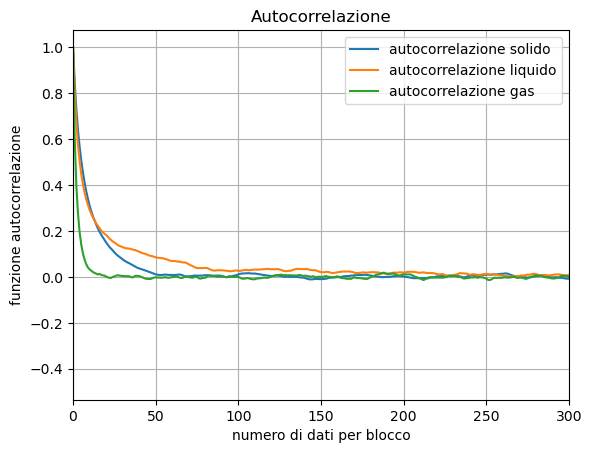

In [48]:
import matplotlib.pyplot as plt
import numpy as np


# Carica i dati dal file
datas = np.loadtxt('7.1/solido/output_epot.dat', usecols=1)
datal = np.loadtxt('7.1/liquido/output_epot.dat', usecols=1)
datag = np.loadtxt('7.1/gas/output_epot.dat', usecols=1)

# Numero di dati
nstep = len(datas)

# Array dei tempi
t = np.arange(nstep)

# Array delle distanze fra i dati
d = np.arange(nstep)



# Array della funzione di autocorrelazione
autocorrelaziones = np.zeros(nstep)

# Calcola la funzione di autocorrelazione
for i in range(nstep):
    s = np.mean(datas[:nstep-d[i]]* datas[d[i]:nstep])
    v = np.mean(datas[:nstep-d[i]])
    u = np.mean(datas[d[i]:nstep] ) 
    z = np.mean(datas[:nstep])
    w = np.mean(datas[:nstep] * datas[:nstep])
    sigma = w - z**2
    autocorrelaziones[i] = (s - v*u) / sigma
    


# Array della funzione di autocorrelazione gas
autocorrelazionel = np.zeros(nstep)

# Calcola la funzione di autocorrelazione
for i in range(nstep):
    s = np.mean(datal[:nstep-d[i]]* datal[d[i]:nstep])
    v = np.mean(datal[:nstep-d[i]])
    u = np.mean(datal[d[i]:nstep] ) 
    z = np.mean(datal[:nstep])
    w = np.mean(datal[:nstep] * datal[:nstep])
    sigma = w - z**2
    autocorrelazionel[i] = (s - v*u) / sigma
    
# Array della funzione di autocorrelazione
autocorrelazioneg = np.zeros(nstep)

# Calcola la funzione di autocorrelazione
for i in range(nstep):
    s = np.mean(datag[:nstep-d[i]]* datag[d[i]:nstep])
    v = np.mean(datag[:nstep-d[i]])
    u = np.mean(datag[d[i]:nstep] ) 
    z = np.mean(datag[:nstep])
    w = np.mean(datag[:nstep] * datag[:nstep])
    sigma = w - z**2
    autocorrelazioneg[i] = (s - v*u) / sigma
# Grafico della funzione di autocorrelazione
plt.plot(t[:nstep], autocorrelaziones, label="autocorrelazione solido")
plt.plot(t[:nstep], autocorrelazionel, label="autocorrelazione liquido")
plt.plot(t[:nstep], autocorrelazioneg, label="autocorrelazione gas")
plt.ylabel("funzione autocorrelazione")
plt.xlabel("numero di dati per blocco")
plt.title ("Autocorrelazione")
plt.grid(True)

plt.legend(loc = 'best')

plt.xlim(0,300)
plt.show()

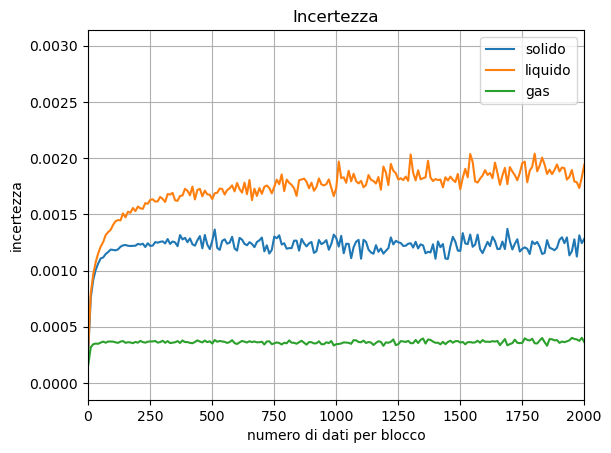

In [38]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2
import numpy as np



def err(data, L):
 M= len(data)
 N= int(M/L)
 glob_av=0
 glob_av2=0
 for i in range(N):
    blk_av=0
    for j in range(L):
        blk_av+=data[j+i*L]
    blk_av/=L
    glob_av+=blk_av
    glob_av2+=blk_av**2
 glob_av/=N
 glob_av2/=N
 return np.sqrt( (glob_av2 - glob_av**2)/N)

# Carica i dati dal file
datas = np.loadtxt('7.1/solido/output_epot.dat', usecols=1)
datal= np.loadtxt('7.1/liquido/output_epot.dat', usecols=1)
datag = np.loadtxt('7.1/gas/output_epot.dat', usecols=1)


# Numero di dati
nstep = len(datas)



# Array della grandezza dei blocchi
x = np.arange(1,nstep,10)


incertezzas = [err(datas,l) for l in range (1,nstep,10)]
incertezzal = [err(datal,l) for l in range (1,nstep,10)]
incertezzag = [err(datag,l) for l in range (1,nstep,10)]

# Grafico della funzione di incertezza
plt.plot(x, incertezzas, label= 'solido')
plt.plot(x, incertezzal, label= 'liquido')
plt.plot(x, incertezzag, label= 'gas')
plt.ylabel("incertezza")
plt.xlabel("numero di dati per blocco")
plt.title ("Incertezza")
plt.xlim(0,2000)
plt.grid(True)
plt.legend(loc = 'best')
plt.show()



Dall'analisi 1 risulta che dopo 300 passi l'autocorrelazione fra le misure tende a zero, dall'analisi 2 risulta invece che inizialmente l'incertezza viene sottostimata, ma dopo 1000 passi questa si stabilizza. 
Scegliendo 2000 step per blocco avremo quindi dei dati
1. statisticamente scorrelati
2. con una valutazione corrretta dell'errore

Utilizzando il data blocking con questi parametri andiamo a misurare la pressione e l'energia potenziale nelle seguenti condizioni termodinamiche:
1. solido: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cut-off : $r_c = 2.2$)
2. liquido: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cut-off : $r_c = 2.5$)
3. gas: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cut-off : $r_c = 5.0$)

La simulazione viene eseguita utilizzando il metodo Metropolis, utilizzando un passo $\delta$ tale che il tasso di accettanza sia circa pari al 50%, in modo da avere un buon compromesso fra efficienza e correlazione, si è utilizzato 
1. $\delta$ = 0.11 per il solido
2. $\delta$ = 0.2 per il liquido
3. $\delta$ = 7 per il gas



## <span style="color:orange"> Simulazione fase solida</span>

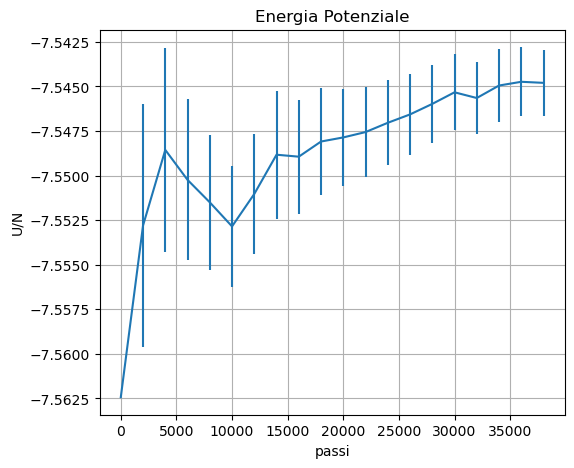

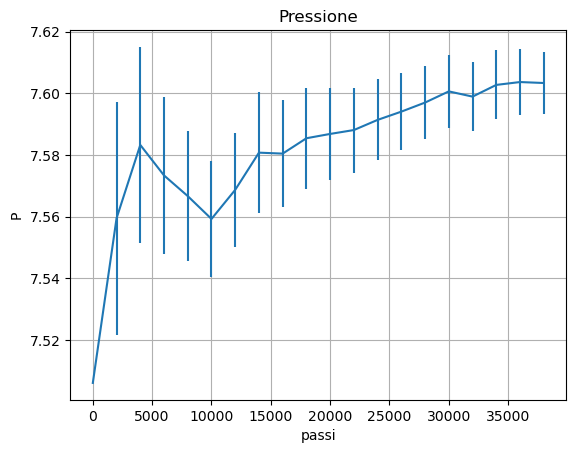

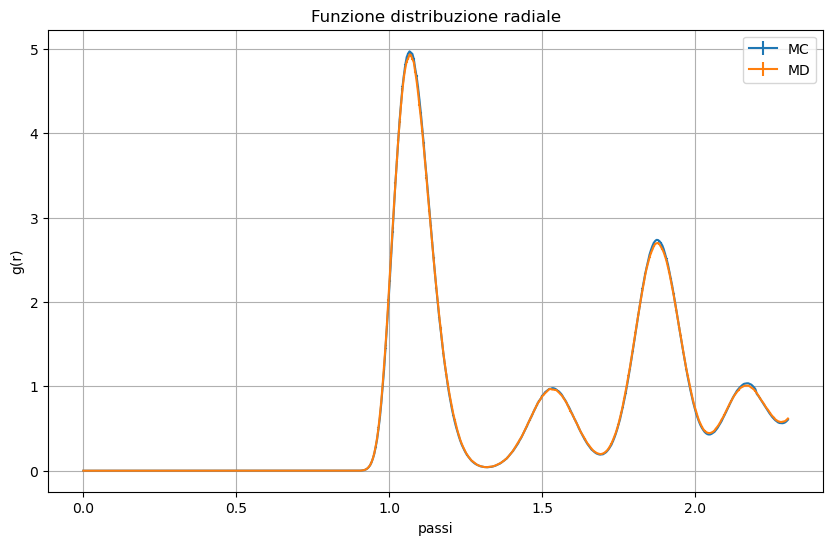

In [30]:
import matplotlib.pyplot as plt
import numpy as np



# Carica i dati dal file
data = np.loadtxt('7.4/solido/output_epot.dat')
x = np.arange(len(data))
x*=2000
plt.figure(figsize=(6,5))
plt.errorbar(x,data[:,2],yerr=data[:,3])
plt.xlabel('passi')
plt.ylabel('U/N')
plt.grid(True)
plt.title('Energia Potenziale')
plt.show()

import matplotlib.pyplot as plt
import numpy as np


# Carica i dati dal file

data = np.loadtxt('7.4/solido/output_press.dat')

plt.errorbar(x,data[:,2],yerr=data[:,3], label='MC')

plt.xlabel('passi')
plt.ylabel('P')
plt.grid(True)
plt.title('Pressione')
plt.show()




# Carica i dati dal file

data = np.loadtxt('7.4/solido/output_gf.dat')
dataMD = np.loadtxt('7.4/solido/output_gf (1).dat')
plt.figure(figsize=(10,6))
plt.errorbar(data[:,0],data[:,1],yerr=data[:,2], label='MC')
plt.errorbar(dataMD[:,0], dataMD[:,1], yerr=dataMD[:,2], label='MD')
plt.xlabel('passi')
plt.ylabel('g(r)')
plt.grid(True)
plt.title('Funzione distribuzione radiale')

plt.legend(loc = 'best')

plt.show()


## <span style="color:orange"> Simulazione fase liquida</span>

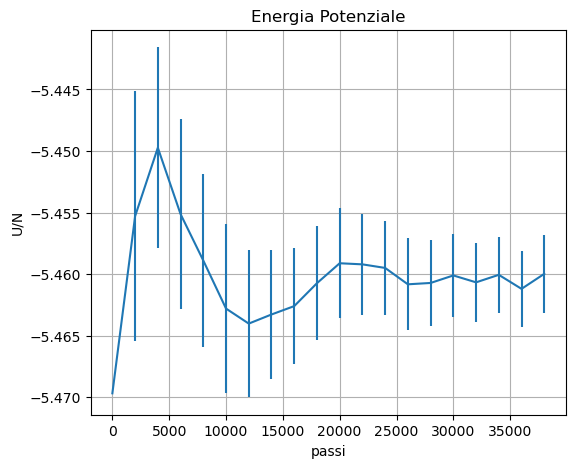

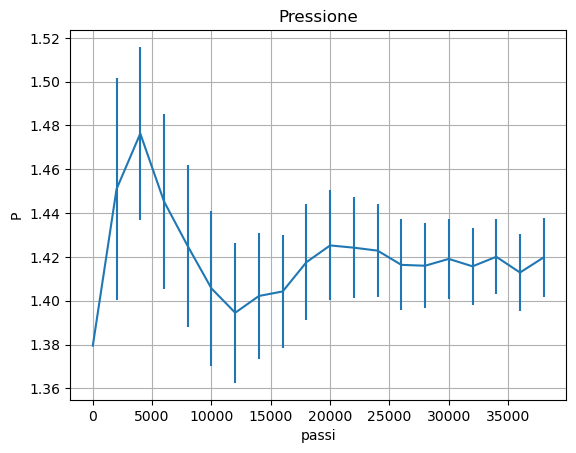

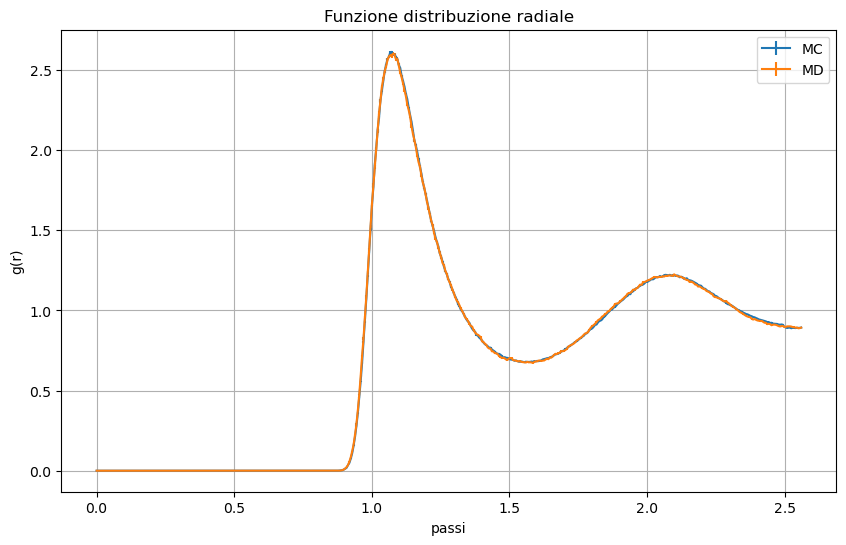

In [35]:
import matplotlib.pyplot as plt
import numpy as np



# Carica i dati dal file

data = np.loadtxt('7.4/liquido/output_epot.dat')
x = np.arange(len(data))
x*=2000
plt.figure(figsize=(6.13,5))
plt.errorbar(x,data[:,2],yerr=data[:,3])
plt.xlabel('passi')
plt.ylabel('U/N')
plt.grid(True)
plt.title('Energia Potenziale')
plt.show()


# Carica i dati dal file

data = np.loadtxt('7.4/liquido/output_press.dat')

plt.errorbar(x,data[:,2],yerr=data[:,3])
plt.xlabel('passi')
plt.ylabel('P')
plt.grid(True)
plt.title('Pressione')
plt.show()




# Carica i dati dal file

data = np.loadtxt('7.4/liquido/output_gf.dat')
dataMD = np.loadtxt('7.4/liquido/output_gf (1).dat')
plt.figure(figsize=(10,6))
plt.errorbar(data[:,0],data[:,1],yerr=data[:,2], label= 'MC')
plt.errorbar(dataMD[:,0],dataMD[:,1],yerr=dataMD[:,2],  label= 'MD')
plt.xlabel('passi')
plt.ylabel('g(r)')
plt.grid(True)
plt.title('Funzione distribuzione radiale')
plt.legend(loc = 'best')
plt.show()


## <span style="color:orange"> Simulazione fase gassosa</span>

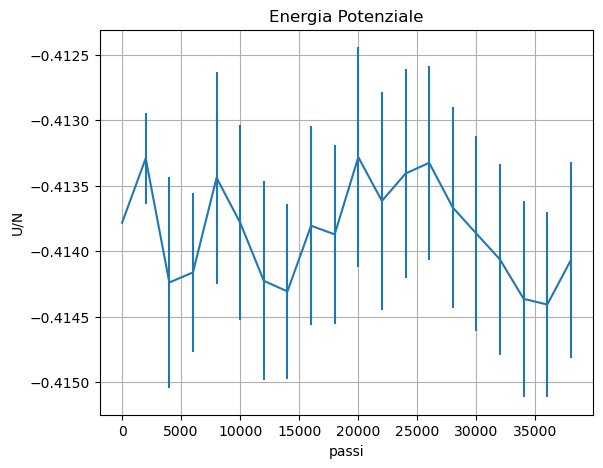

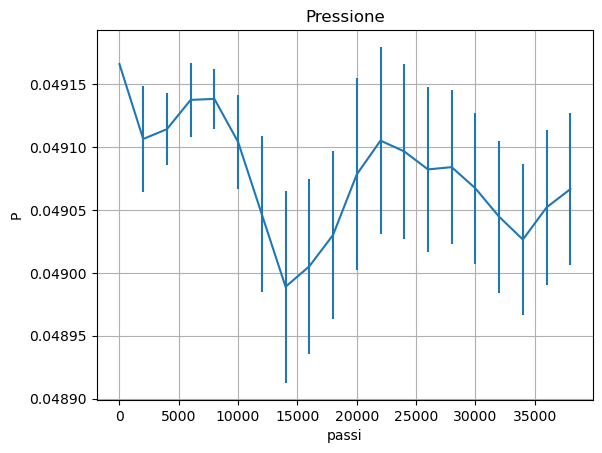

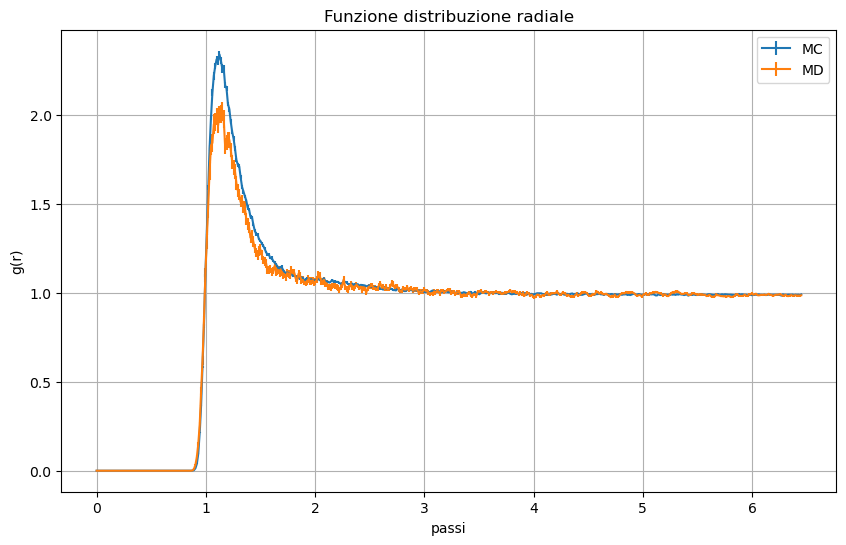

In [39]:
import matplotlib.pyplot as plt
import numpy as np



# Carica i dati dal file

data = np.loadtxt('7.4/gas/output_epot.dat')
x = np.arange(len(data))
x*=2000
plt.figure(figsize=(6.37,5))
plt.errorbar(x,data[:,2],yerr=data[:,3])
plt.xlabel('passi')
plt.ylabel('U/N')
plt.grid(True)
plt.title('Energia Potenziale')
plt.show()

import matplotlib.pyplot as plt
import numpy as np



# Carica i dati dal file

data = np.loadtxt('7.4/gas/output_press.dat')

plt.errorbar(x,data[:,2],yerr=data[:,3])
plt.xlabel('passi')
plt.ylabel('P')
plt.grid(True)
plt.title('Pressione')
plt.show()




# Carica i dati dal file

data = np.loadtxt('7.4/gas/output_gf.dat')
dataMD = np.loadtxt('7.4/gas/output_gf (1).dat')
plt.figure(figsize=(10,6))
plt.errorbar(data[:,0],data[:,1],yerr=data[:,2], label= 'MC')
plt.errorbar(dataMD[:,0],dataMD[:,1],yerr=dataMD[:,2],  label= 'MD')
plt.xlabel('passi')
plt.ylabel('g(r)')
plt.grid(True)
plt.legend(loc = 'best')
plt.title('Funzione distribuzione radiale')
plt.show()
